In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/BankNote_Authentication.csv")
print(data.head())


   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10),
                    activation='relu',
                    solver='adam',
                    max_iter=500,
                    early_stopping=True,
                    validation_fraction=0.1,
                    random_state=42)


In [ ]:
history = mlp.fit(X_train, y_train)


In [ ]:
y_pred = mlp.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Confusion Matrix:
 [[147   1]
 [ 26 101]]
Accuracy: 0.9018181818181819
Precision: 0.9901960784313726
Recall: 0.7952755905511811
F1 Score: 0.8820960698689956


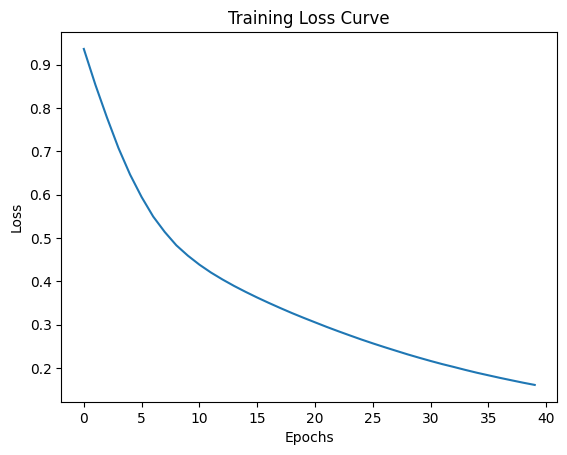

In [ ]:
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [ ]:
for act in ['tanh', 'logistic', 'identity']:
    mlp_alt = MLPClassifier(hidden_layer_sizes=(10,10),
                            activation=act,
                            solver='adam',
                            max_iter=500,
                            early_stopping=True,
                            validation_fraction=0.1,
                            random_state=42)
    mlp_alt.fit(X_train, y_train)
    y_pred_alt = mlp_alt.predict(X_test)
    print(f"\nActivation: {act}")
    print("Accuracy:", accuracy_score(y_test, y_pred_alt))



Activation: tanh
Accuracy: 0.9272727272727272

Activation: logistic
Accuracy: 0.5381818181818182

Activation: identity
Accuracy: 0.8909090909090909
